In [21]:
pip install numpy pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import time
from IPython.display import display, clear_output

sns.set(style="whitegrid")


In [23]:
# Total simulation steps
n_steps = 100  

# Step to introduce a leak
leak_start = 40  

# Flow difference threshold for rule-based detection
threshold = 5


In [24]:
flow_in_list = []
flow_out_list = []
pressure_list = []
leak_rule_list = []


In [25]:
for step in range(n_steps):
    # Simulate normal flow
    flow_in = np.random.randint(95, 105)
    
    # Introduce leak after leak_start
    if step >= leak_start:
        flow_out = flow_in - np.random.randint(6, 15)  # Leak
        pressure = np.random.randint(50, 65)
    else:
        flow_out = flow_in - np.random.randint(0, 3)   # Normal
        pressure = np.random.randint(60, 70)
    
    # Rule-based leak detection
    leak_detected = abs(flow_in - flow_out) > threshold
    
    # Append to lists
    flow_in_list.append(flow_in)
    flow_out_list.append(flow_out)
    pressure_list.append(pressure)
    leak_rule_list.append(leak_detected)


In [26]:
df = pd.DataFrame({
    "Step": range(n_steps),
    "Flow_In": flow_in_list,
    "Flow_Out": flow_out_list,
    "Pressure": pressure_list,
    "Leak_Rule": leak_rule_list
})

# Display first 10 rows
df.head(10)


,Step,Flow_In,Flow_Out,Pressure,Leak_Rule
0,0,95,94,61,False
1,1,98,96,65,False
2,2,101,101,60,False
3,3,95,93,62,False
4,4,97,95,66,False
5,5,96,96,60,False
6,6,96,95,67,False
7,7,101,101,62,False
8,8,97,96,65,False
9,9,104,104,61,False


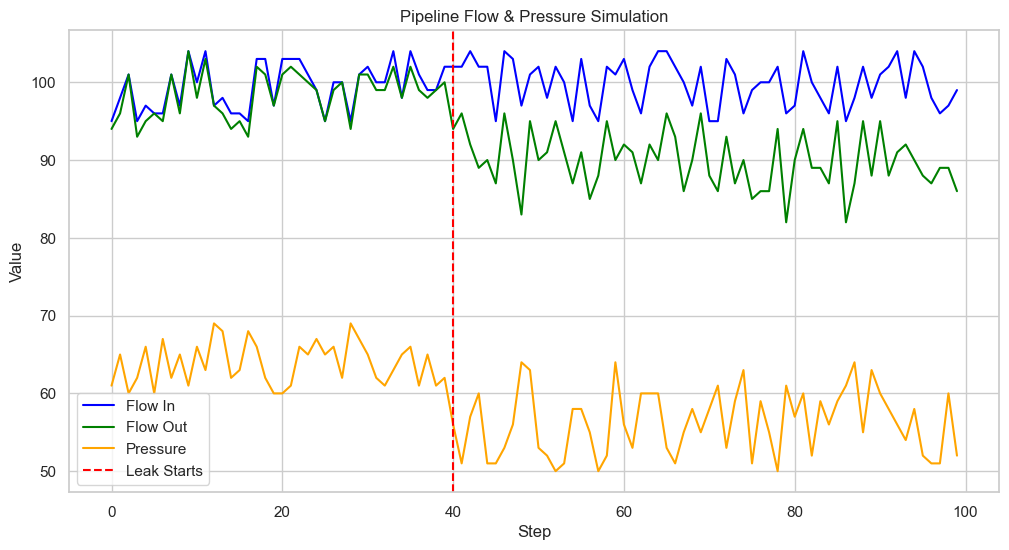

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df['Step'], df['Flow_In'], label='Flow In', color='blue')
plt.plot(df['Step'], df['Flow_Out'], label='Flow Out', color='green')
plt.plot(df['Step'], df['Pressure'], label='Pressure', color='orange')
plt.axvline(leak_start, color='red', linestyle='--', label='Leak Starts')
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("Pipeline Flow & Pressure Simulation")
plt.legend()
plt.show()


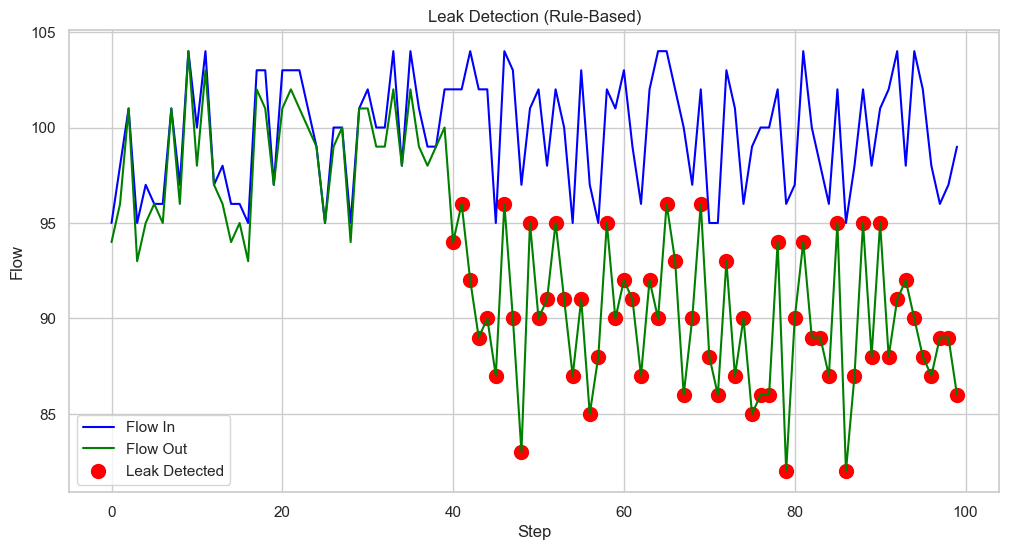

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['Step'], df['Flow_In'], label='Flow In', color='blue')
plt.plot(df['Step'], df['Flow_Out'], label='Flow Out', color='green')

# Highlight leak points
leak_steps = df[df['Leak_Rule']==True]['Step']
leak_values = df[df['Leak_Rule']==True]['Flow_Out']
plt.scatter(leak_steps, leak_values, color='red', s=100, label='Leak Detected')

plt.xlabel("Step")
plt.ylabel("Flow")
plt.title("Leak Detection (Rule-Based)")
plt.legend()
plt.show()


In [29]:
# Use Flow and Pressure as features
X = df[['Flow_In','Flow_Out','Pressure']]

# Train IsolationForest on first 30 steps (normal operation)
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X[:leak_start])

# Predict anomalies for all steps
df['Leak_ML'] = clf.predict(X)
df['Leak_ML'] = df['Leak_ML'].apply(lambda x: True if x==-1 else False)

# Display
df.head(10)


,Step,Flow_In,Flow_Out,Pressure,Leak_Rule,Leak_ML
0,0,95,94,61,False,False
1,1,98,96,65,False,False
2,2,101,101,60,False,False
3,3,95,93,62,False,False
4,4,97,95,66,False,False
5,5,96,96,60,False,False
6,6,96,95,67,False,False
7,7,101,101,62,False,False
8,8,97,96,65,False,False
9,9,104,104,61,False,True


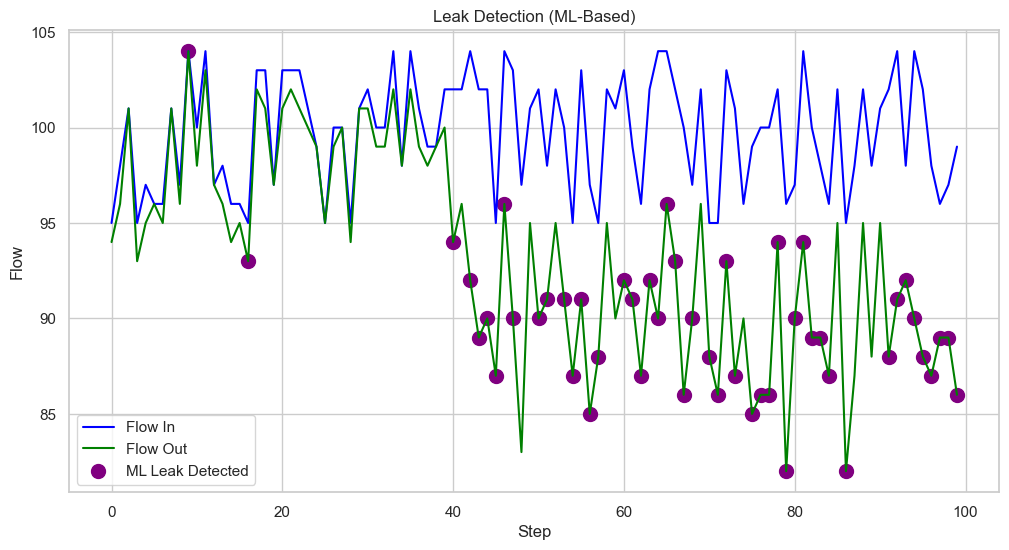

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['Step'], df['Flow_In'], label='Flow In', color='blue')
plt.plot(df['Step'], df['Flow_Out'], label='Flow Out', color='green')

# Highlight ML anomalies
ml_leak_steps = df[df['Leak_ML']==True]['Step']
ml_leak_values = df[df['Leak_ML']==True]['Flow_Out']
plt.scatter(ml_leak_steps, ml_leak_values, color='purple', s=100, label='ML Leak Detected')

plt.xlabel("Step")
plt.ylabel("Flow")
plt.title("Leak Detection (ML-Based)")
plt.legend()
plt.show()


In [31]:
print("Rule-based detected leaks:")
display(df[df['Leak_Rule']==True][['Step','Flow_In','Flow_Out','Pressure']])

print("ML-based detected leaks:")
display(df[df['Leak_ML']==True][['Step','Flow_In','Flow_Out','Pressure']])


Rule-based detected leaks:


,Step,Flow_In,Flow_Out,Pressure
40,40,102,94,56
41,41,102,96,51
42,42,104,92,57
43,43,102,89,60
44,44,102,90,51
45,45,95,87,51
46,46,104,96,53
47,47,103,90,56
48,48,97,83,64
49,49,101,95,63


ML-based detected leaks:


,Step,Flow_In,Flow_Out,Pressure
9,9,104,104,61
16,16,95,93,68
40,40,102,94,56
42,42,104,92,57
43,43,102,89,60
44,44,102,90,51
45,45,95,87,51
46,46,104,96,53
47,47,103,90,56
50,50,102,90,53


In [42]:
df.to_csv("pipeline_leak_simulation.csv", index=False)
print("Simulation saved as pipeline_leak_simulation.csv")


Simulation saved as pipeline_leak_simulation.csv
